In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [112]:
df = pd.read_csv("~/Desktop/Assignment/Heart_Failure_Prediction_Team_0/data/raw/heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [113]:
df.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [114]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [116]:

df['Sex'] = df['Sex'].astype(str)

# Create a pie chart
fig = px.pie(df, 
             names="Sex", 
             title="Sex Ratio in the Data", 
             color="Sex", 
             color_discrete_map={"M": "blue", "F": "red"})  # Assign colors

# Show the plot
fig.show()


In [117]:
# Create a histogram for the distribution of Heart Disease by Sex with custom colors
fig = px.histogram(df, 
                   x="HeartDisease", 
                   color="Sex", 
                   hover_data=df.columns, 
                   title="Distribution of Heart Diseases", 
                   barmode="group",
                   color_discrete_map={"M": "blue", "F": "red"})  # Blue for M and Red for F

# Show the plot
fig.show()


In [118]:
fig=px.histogram(df,
                 x="Age",
                 color="HeartDisease",
                 hover_data=df.columns,
                 title="Age distribution of people with and without HeartDisease")
fig.show()

In [119]:
# Assuming 'df' is the DataFrame containing your data

# Filter data where HeartDisease = 1
df_heart_disease = df[df['HeartDisease'] == 1]

# Calculate the total number of people with HeartDisease = 1
total_heart_disease = len(df_heart_disease)

# Separate the data into males and females
df_male = df_heart_disease[df_heart_disease['Sex'] == 'M']
df_female = df_heart_disease[df_heart_disease['Sex'] == 'F']

# Calculate averages and percentages
average_age = df_heart_disease['Age'].mean()
average_age_male = df_male['Age'].mean()
average_age_female = df_female['Age'].mean()

male_percentage = (len(df_male) / total_heart_disease) * 100
female_percentage = (len(df_female) / total_heart_disease) * 100

mean_restingBP = df_heart_disease['RestingBP'].mean()
mean_cholesterol = df_heart_disease['Cholesterol'].mean()
mean_fastingBS = df_heart_disease['FastingBS'].mean()
mean_maxHR = df_heart_disease['MaxHR'].mean()

# Total average for percentage contribution calculation
total_avg = (mean_restingBP + mean_cholesterol + mean_fastingBS + mean_maxHR) / 4

# Print results
print(f"Average Age (Heart Disease): {average_age:.2f} | Male: {average_age_male:.2f} | Female: {average_age_female:.2f}")
print(f"Males with Heart Disease: {male_percentage:.2f}% | Females: {female_percentage:.2f}%")
print(f"RestingBP: {mean_restingBP:.2f}, Cholesterol: {mean_cholesterol:.2f}, FastingBS: {mean_fastingBS:.2f}, MaxHR: {mean_maxHR:.2f}")
print(f"Total Average: {total_avg:.2f}")
print(f"RestingBP Contribution: {((mean_restingBP / total_avg) * 100):.2f}%")
print(f"Cholesterol Contribution: {((mean_cholesterol / total_avg) * 100):.2f}%")
print(f"FastingBS Contribution: {((mean_fastingBS / total_avg) * 100):.2f}%")
print(f"MaxHR Contribution: {((mean_maxHR / total_avg) * 100):.2f}%")


Average Age (Heart Disease): 55.90 | Male: 55.87 | Female: 56.18
Males with Heart Disease: 90.16% | Females: 9.84%
RestingBP: 134.19, Cholesterol: 175.94, FastingBS: 0.33, MaxHR: 127.66
Total Average: 109.53
RestingBP Contribution: 122.51%
Cholesterol Contribution: 160.63%
FastingBS Contribution: 0.31%
MaxHR Contribution: 116.55%


In [120]:
# Filter data where HeartDisease = 1
df_heart_disease = df[df['HeartDisease'] == 1]

# Calculate total number of people with HeartDisease = 1
total_heart_disease = df_heart_disease.shape[0]

# Count the occurrences of each ChestPainType (ATA, NAP, ASY) for people with HeartDisease = 1
count_ATA = df_heart_disease[df_heart_disease['ChestPainType'] == 'ATA'].shape[0]
count_NAP = df_heart_disease[df_heart_disease['ChestPainType'] == 'NAP'].shape[0]
count_ASY = df_heart_disease[df_heart_disease['ChestPainType'] == 'ASY'].shape[0]

# Calculate the percentages
percentage_ATA = (count_ATA / total_heart_disease) * 100
percentage_NAP = (count_NAP / total_heart_disease) * 100
percentage_ASY = (count_ASY / total_heart_disease) * 100

# Print the results with percentages
print(f"Number of people with HeartDisease = 1 and ChestPainType = ATA: {count_ATA} ({percentage_ATA:.2f}%)")
print(f"Number of people with HeartDisease = 1 and ChestPainType = NAP: {count_NAP} ({percentage_NAP:.2f}%)")
print(f"Number of people with HeartDisease = 1 and ChestPainType = ASY: {count_ASY} ({percentage_ASY:.2f}%)")

Number of people with HeartDisease = 1 and ChestPainType = ATA: 24 (4.72%)
Number of people with HeartDisease = 1 and ChestPainType = NAP: 72 (14.17%)
Number of people with HeartDisease = 1 and ChestPainType = ASY: 392 (77.17%)


In [121]:
# Filter data where HeartDisease = 1
df_heart_disease = df[df['HeartDisease'] == 1]

# Calculate the average age for those with HeartDisease = 1
average_age = df_heart_disease['Age'].mean()


# Separate the data into males and females
df_male = df_heart_disease[df_heart_disease['Sex'] == 'M']
df_female = df_heart_disease[df_heart_disease['Sex'] == 'F']

# Calculate the average age for males and females with HeartDisease = 1
average_age_male = df_male['Age'].mean()
average_age_female = df_female['Age'].mean()


# Calculate the mean values for the relevant columns
mean_restingBP = df_heart_disease['RestingBP'].mean()
mean_cholesterol = df_heart_disease['Cholesterol'].mean()
mean_fastingBS = df_heart_disease['FastingBS'].mean()
mean_maxHR = df_heart_disease['MaxHR'].mean()

# Print the average age
print(f"The average age for people with Heart Disease is: {average_age:.2f}")
print(f"The average age for males with Heart Disease is: {average_age_male:.2f}")
print(f"The average age for females with Heart Disease is: {average_age_female:.2f}")

# Print the results
print(f"Mean RestingBP for people with Heart Disease: {mean_restingBP:.2f}")
print(f"Mean Cholesterol for people with Heart Disease: {mean_cholesterol:.2f}")
print(f"Mean FastingBS for people with Heart Disease: {mean_fastingBS:.2f}")
print(f"Mean MaxHR for people with Heart Disease: {mean_maxHR:.2f}")

The average age for people with Heart Disease is: 55.90
The average age for males with Heart Disease is: 55.87
The average age for females with Heart Disease is: 56.18
Mean RestingBP for people with Heart Disease: 134.19
Mean Cholesterol for people with Heart Disease: 175.94
Mean FastingBS for people with Heart Disease: 0.33
Mean MaxHR for people with Heart Disease: 127.66


In [122]:


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])



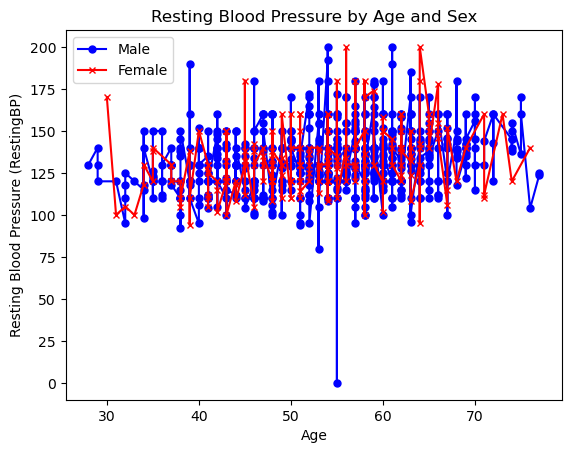

In [123]:
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame containing your data
# Filter data for males and females
df_male = df[df['Sex'] == 'M'].sort_values(by='Age')  # Sort males by Age
df_female = df[df['Sex'] == 'F'].sort_values(by='Age')  # Sort females by Age

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plotting RestingBP vs Age for males
ax.plot(df_male['Age'], df_male['RestingBP'], label='Male', color='blue', marker='o', linestyle='-', markersize=5)

# Plotting RestingBP vs Age for females
ax.plot(df_female['Age'], df_female['RestingBP'], label='Female', color='red', marker='x', linestyle='-', markersize=5)

# Adding labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Resting Blood Pressure (RestingBP)')
ax.set_title('Resting Blood Pressure by Age and Sex')

# Adding a legend
ax.legend()

# Display the plot
plt.show()


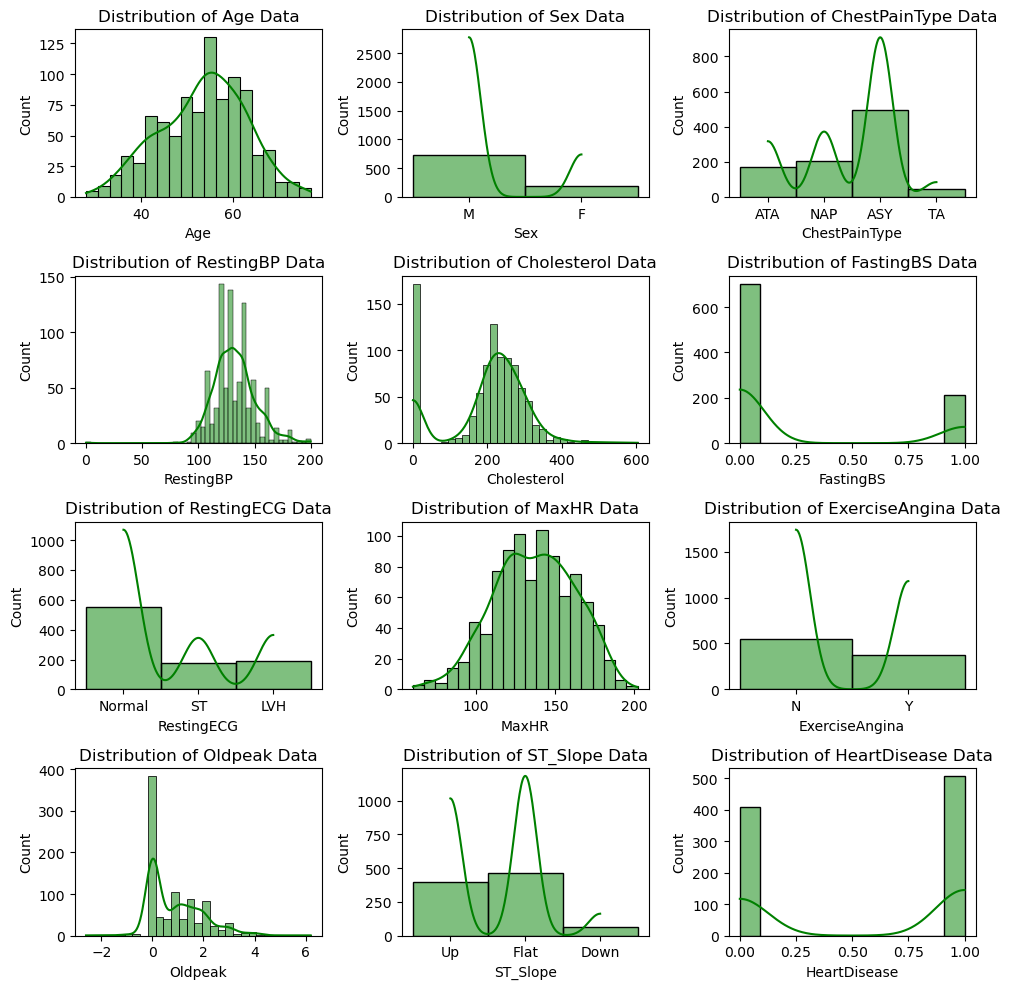

In [124]:
plt.figure(figsize=(10,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True, color='green')
    plt.tight_layout()
    plt.plot()

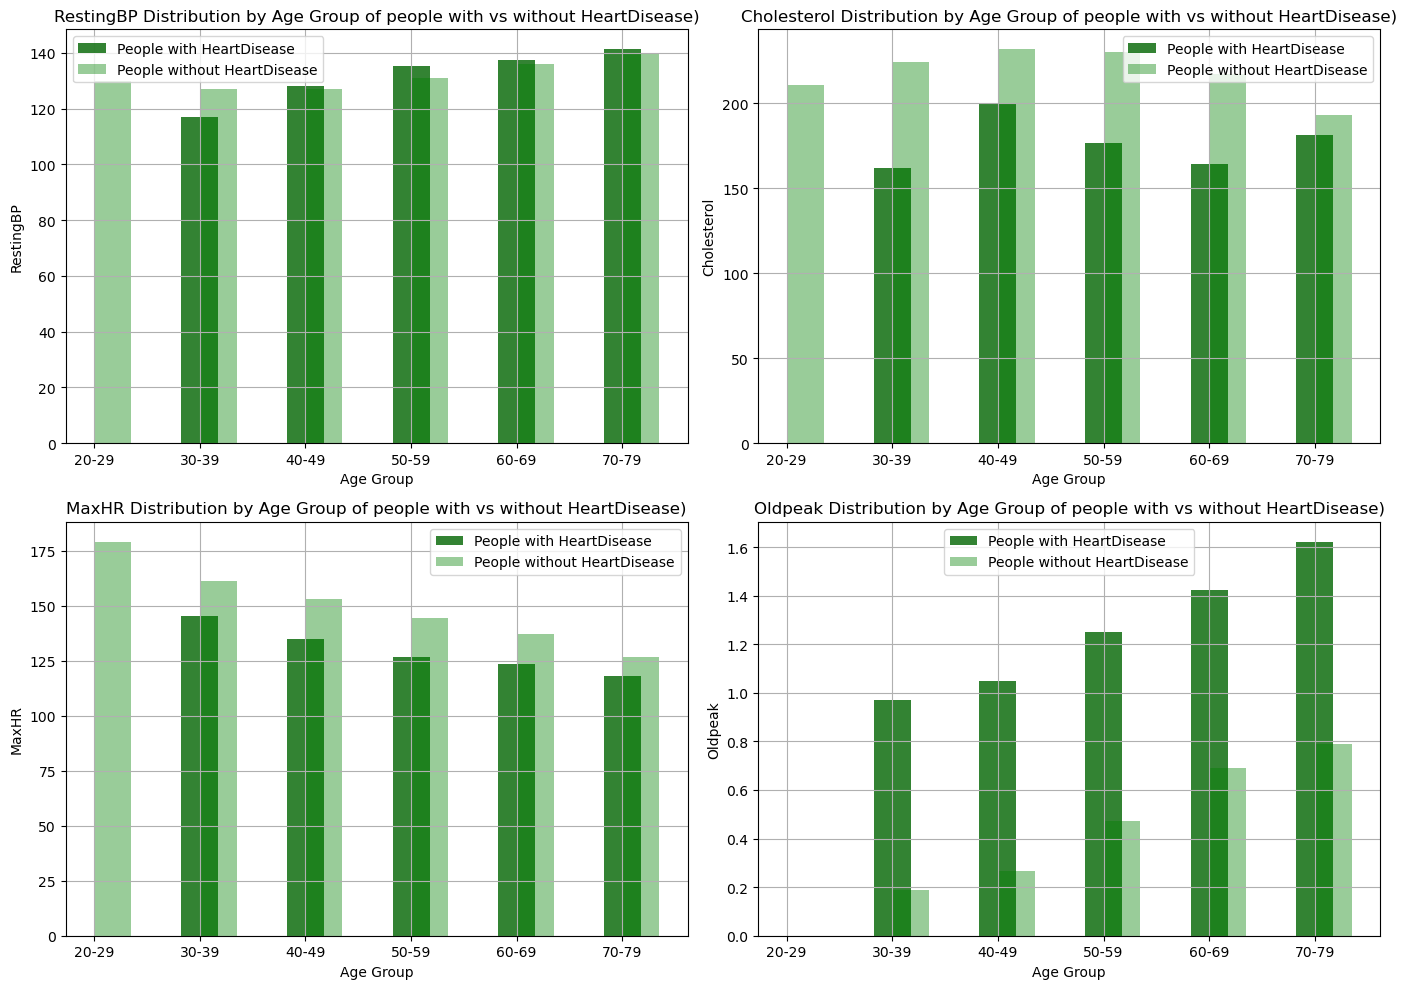

In [125]:

# Filter data for HeartDisease = 1 and HeartDisease = 0
df_heart_1 = df[df['HeartDisease'] == 1]
df_heart_0 = df[df['HeartDisease'] == 0]

# Define age bins and labels
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df_heart_1['AgeGroup'] = pd.cut(df_heart_1['Age'], bins=age_bins, labels=age_labels, right=False)
df_heart_0['AgeGroup'] = pd.cut(df_heart_0['Age'], bins=age_bins, labels=age_labels, right=False)

# Features to plot
features = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Generate bar graphs for both groups
bar_width = 0.35  # Width of each bar
for i, feature in enumerate(features):
    ax = axes[i]
    
    # Aggregate mean values for each age group for HeartDisease = 1
    grouped_data_1 = df_heart_1.groupby('AgeGroup')[feature].mean().reset_index()
    
    # Aggregate mean values for each age group for HeartDisease = 0
    grouped_data_0 = df_heart_0.groupby('AgeGroup')[feature].mean().reset_index()
    
    # Plot the bar graph for HeartDisease = 1 and HeartDisease = 0 side by side
    ax.bar(grouped_data_1['AgeGroup'], grouped_data_1[feature], color='darkgreen', alpha=0.8, width=bar_width, label="People with HeartDisease", align='center')
    ax.bar(grouped_data_0['AgeGroup'], grouped_data_0[feature], color='green', alpha=0.4, width=bar_width, label="People without HeartDisease", align='edge')
    
    # Title and labels
    ax.set_title(f'{feature} Distribution by Age Group of people with vs without HeartDisease)', fontsize=12)
    ax.set_xlabel('Age Group', fontsize=10)
    ax.set_ylabel(feature, fontsize=10)
    ax.grid(True)
    
    # Adding legend
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


#Note form the above chart

1.People in the 20-29 age group are less likely to have HeartDisease.

2.Cholesterol levels are higher in individuals with No HeartDisease compared to those with HeartDisease.

3.People without HeartDisease have higher MaxHR compared to those with HeartDisease.

4.Oldpeak values for people with HeartDisease are >0.9 in all population, whereas those without are <=0.8


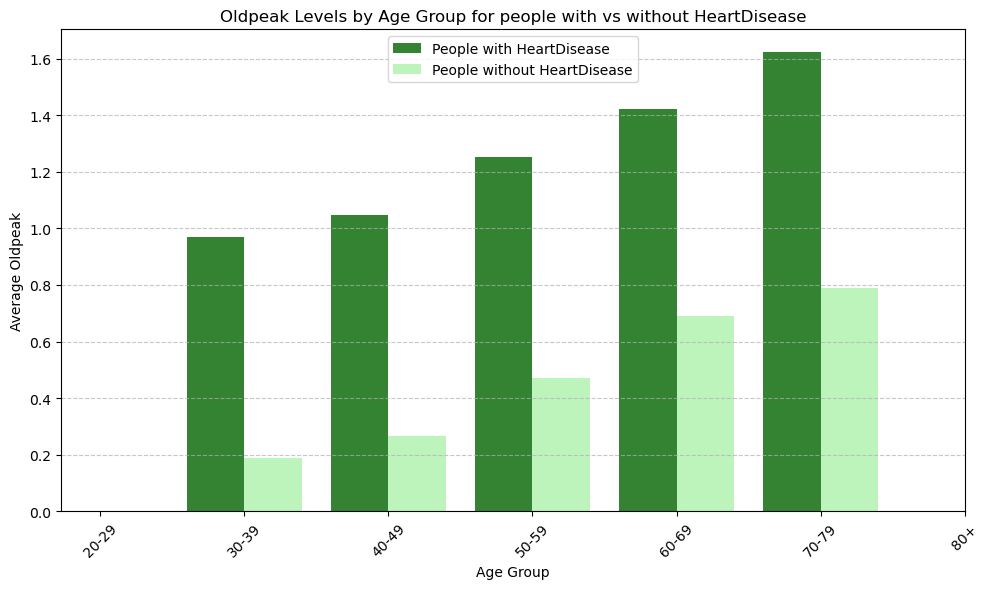

In [126]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for HeartDisease = 1 and HeartDisease = 0
df_heart_1 = df[df['HeartDisease'] == 1]
df_heart_0 = df[df['HeartDisease'] == 0]

# Define age bins and labels
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df_heart_1['AgeGroup'] = pd.cut(df_heart_1['Age'], bins=age_bins, labels=age_labels, right=False)
df_heart_0['AgeGroup'] = pd.cut(df_heart_0['Age'], bins=age_bins, labels=age_labels, right=False)

# Aggregate mean cholesterol for each age group
grouped_1 = df_heart_1.groupby('AgeGroup')['Oldpeak'].mean().reset_index()
grouped_0 = df_heart_0.groupby('AgeGroup')['Oldpeak'].mean().reset_index()

# Define bar width
bar_width = 0.4
age_indexes = range(len(age_labels))

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(age_indexes, grouped_1['Oldpeak'], width=bar_width, color='darkgreen', alpha=0.8, label="People with HeartDisease")
ax.bar([i + bar_width for i in age_indexes], grouped_0['Oldpeak'], width=bar_width, color='lightgreen', alpha=0.6, label="People without HeartDisease")

# Format plot
ax.set_xticks([i + bar_width/2 for i in age_indexes])
ax.set_xticklabels(age_labels, rotation=45)
ax.set_xlabel("Age Group")
ax.set_ylabel("Average Oldpeak")
ax.set_title("Oldpeak Levels by Age Group for people with vs without HeartDisease")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


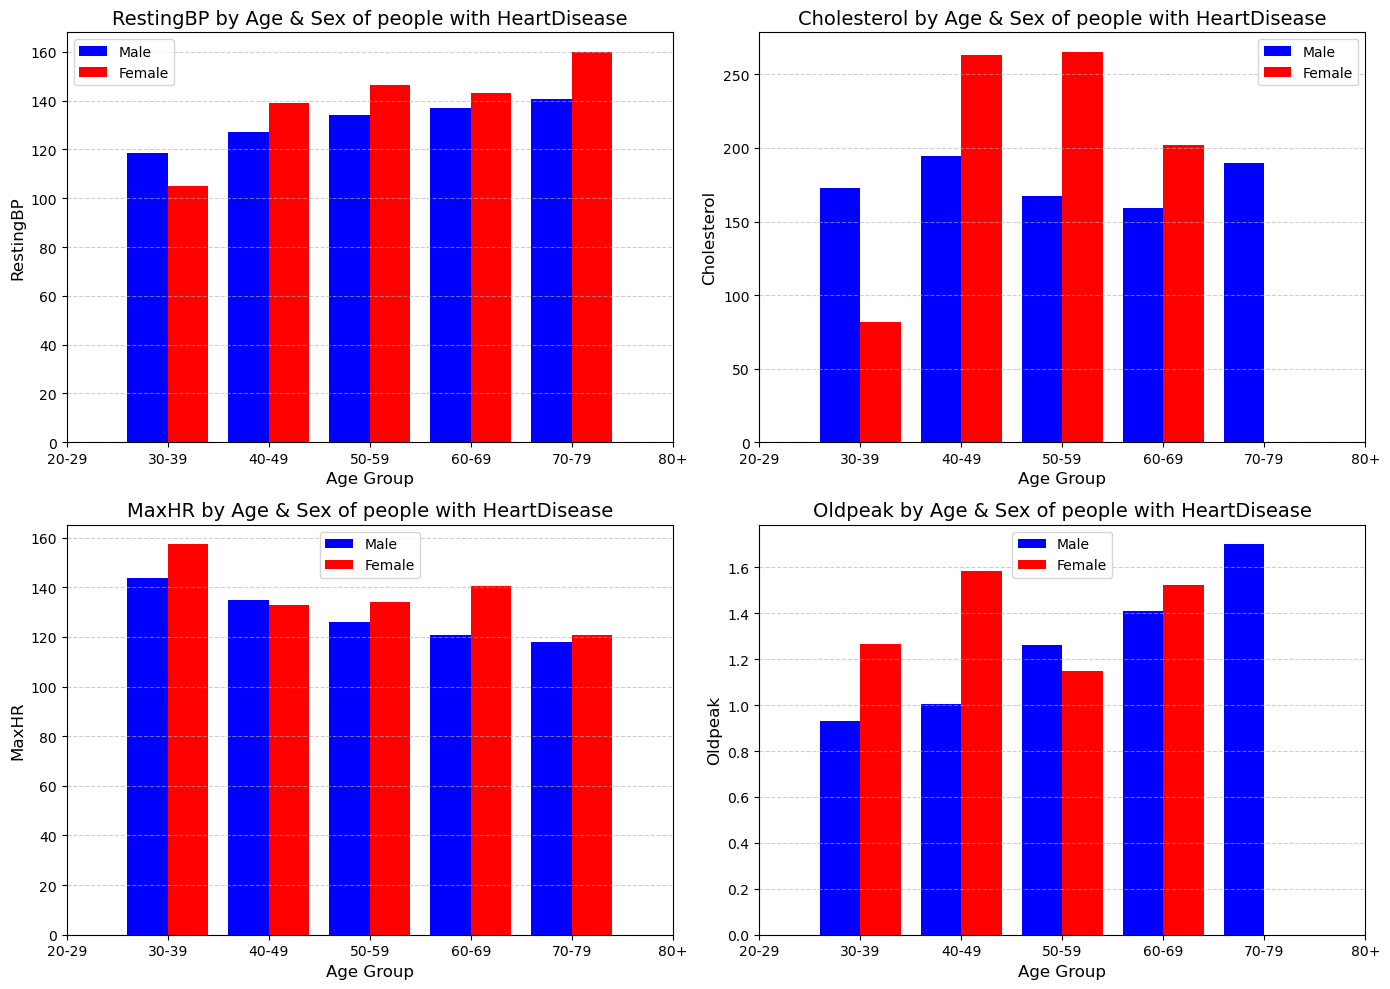

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Filter data for HeartDisease = 1
df_heart_1 = df[df['HeartDisease'] == 1]

# Define age bins and labels
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df_heart_1['AgeGroup'] = pd.cut(df_heart_1['Age'], bins=age_bins, labels=age_labels, right=False)

# Features to plot
features = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Custom color palette
custom_palette = {'M': 'blue', 'F': 'red'}

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Bar width
bar_width = 0.4

for i, feature in enumerate(features):
    ax = axes[i]
    
    # Aggregate mean values by AgeGroup and Sex
    grouped_data = df_heart_1.groupby(['AgeGroup', 'Sex'])[feature].mean().unstack()
    
    # Bar positions
    x = np.arange(len(grouped_data.index))
    
    # Plot bars for Male and Female
    ax.bar(x - bar_width/2, grouped_data['M'], width=bar_width, color='blue', label='Male')
    ax.bar(x + bar_width/2, grouped_data['F'], width=bar_width, color='red', label='Female')
    
    # Set title and labels
    ax.set_title(f'{feature} by Age & Sex of people with HeartDisease', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(grouped_data.index)
    ax.set_xlabel('Age Group', fontsize=12)
    ax.set_ylabel(feature, fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()




In [128]:
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

NameError: name 'data' is not defined

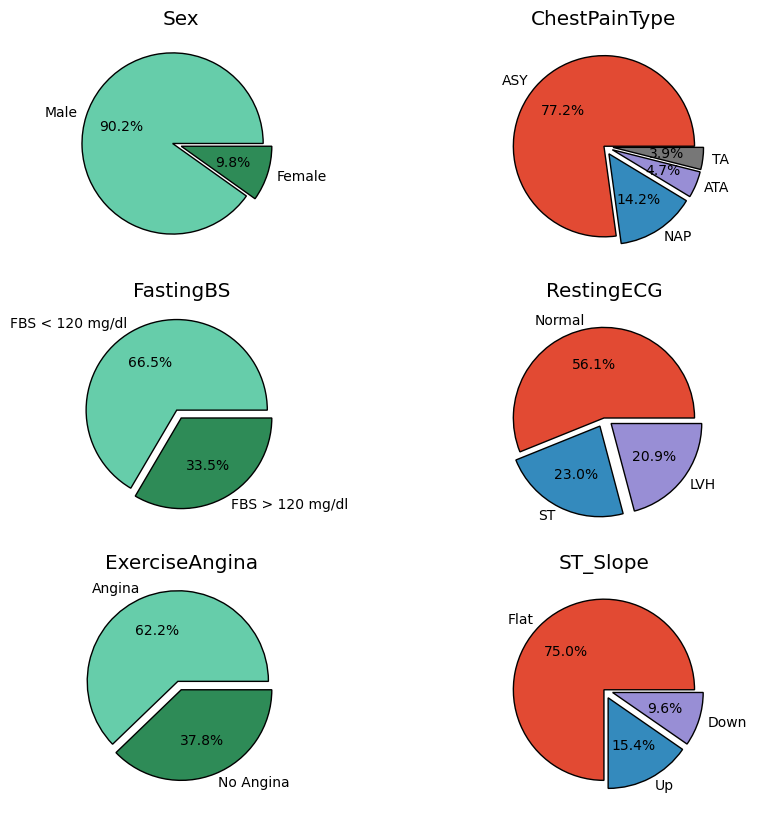

In [ ]:


ax,fig = plt.subplots(nrows = 3,ncols = 2,figsize = (10,10))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 0,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 0,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 0,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 0,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 0,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 0,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');



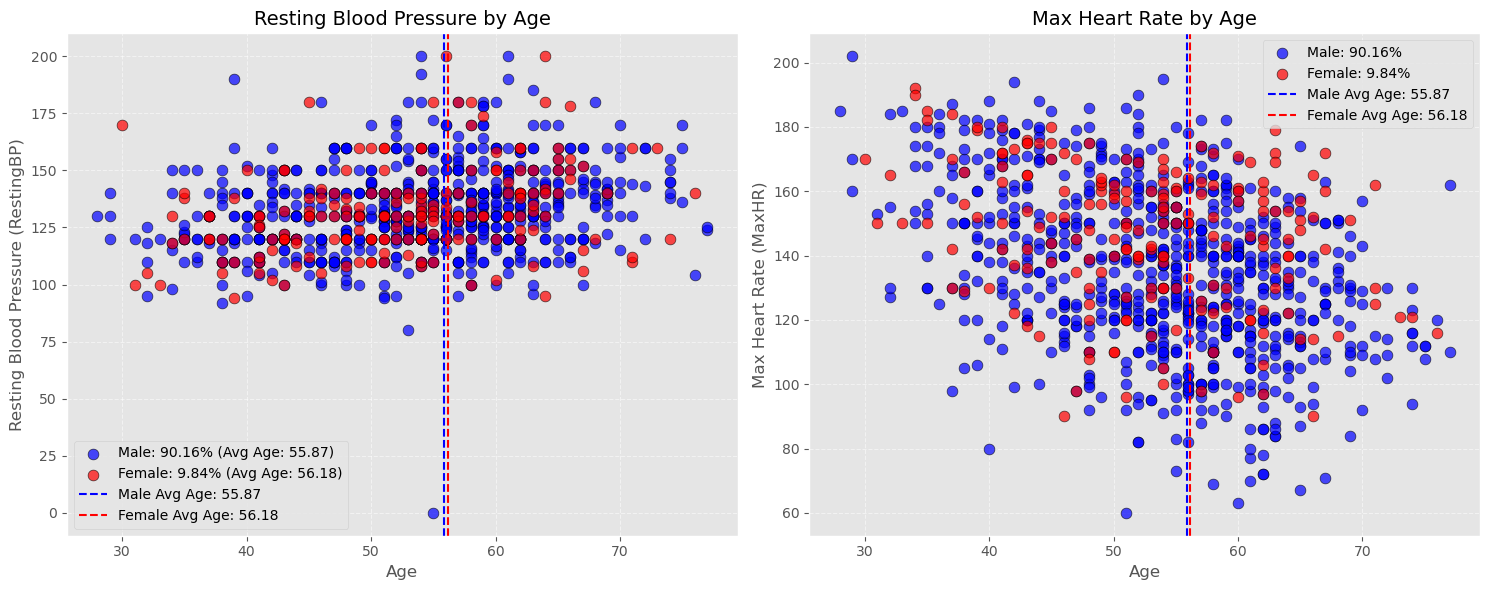

In [ ]:
# Create the figure and axis objects with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ------------------ Scatter Plot 1: Age vs. RestingBP ------------------
axes[0].scatter(df_male['Age'], df_male['RestingBP'], 
                color='blue', label=f'Male: {male_percentage:.2f}% (Avg Age: {average_age_male:.2f})', 
                alpha=0.7, s=60, edgecolor='black')

axes[0].scatter(df_female['Age'], df_female['RestingBP'], 
                color='red', label=f'Female: {female_percentage:.2f}% (Avg Age: {average_age_female:.2f})', 
                alpha=0.7, s=60, edgecolor='black')

axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Resting Blood Pressure (RestingBP)', fontsize=12)
axes[0].set_title('Resting Blood Pressure by Age', fontsize=14)
axes[0].axvline(x=average_age_male, color='blue', linestyle='--', label=f'Male Avg Age: {average_age_male:.2f}')
axes[0].axvline(x=average_age_female, color='red', linestyle='--', label=f'Female Avg Age: {average_age_female:.2f}')
axes[0].legend(fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.5)

# ------------------ Scatter Plot 2: Age vs. MaxHR ------------------
axes[1].scatter(df_male['Age'], df_male['MaxHR'], 
                color='blue', label=f'Male: {male_percentage:.2f}%', 
                alpha=0.7, s=60, edgecolor='black')

axes[1].scatter(df_female['Age'], df_female['MaxHR'], 
                color='red', label=f'Female: {female_percentage:.2f}%', 
                alpha=0.7, s=60, edgecolor='black')

axes[1].set_xlabel('Age', fontsize=12)
axes[1].set_ylabel('Max Heart Rate (MaxHR)', fontsize=12)
axes[1].set_title('Max Heart Rate by Age', fontsize=14)
axes[1].axvline(x=average_age_male, color='blue', linestyle='--', label=f'Male Avg Age: {average_age_male:.2f}')
axes[1].axvline(x=average_age_female, color='red', linestyle='--', label=f'Female Avg Age: {average_age_female:.2f}')
axes[1].legend(fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


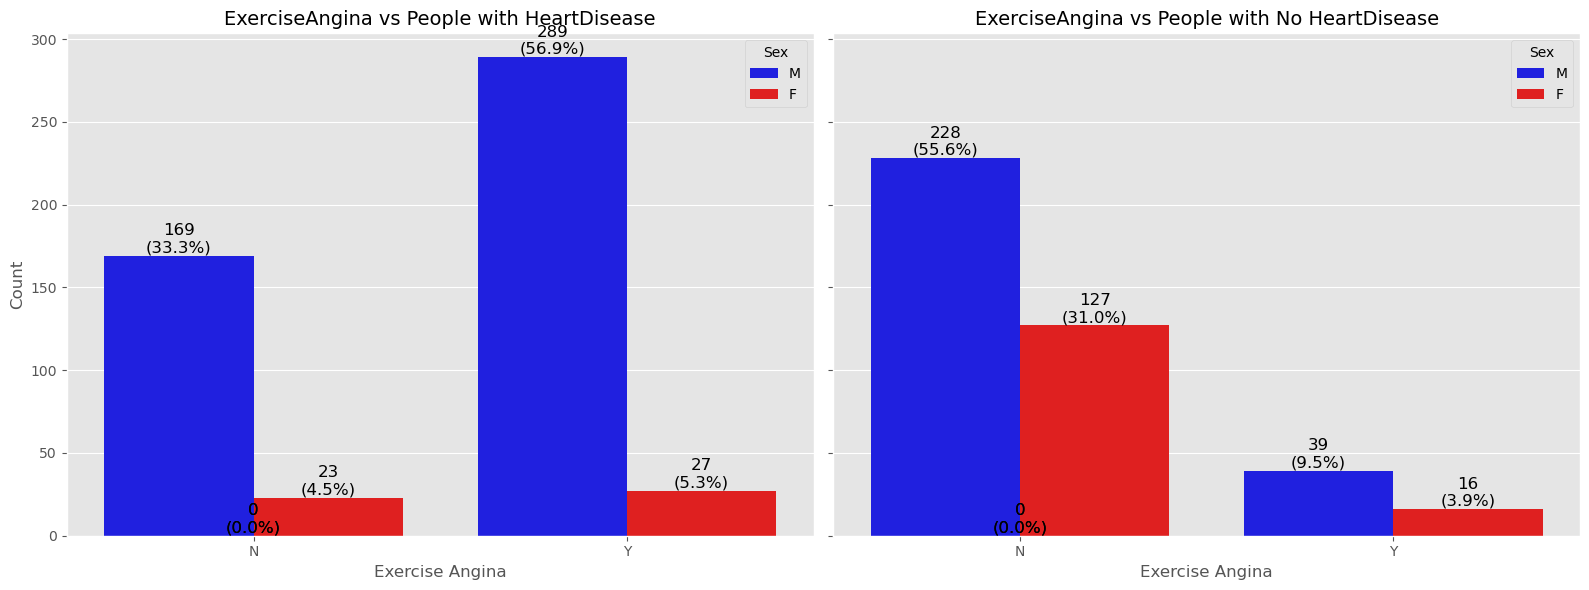

In [ ]:


# Filter data
df_heart_disease_1 = df[df['HeartDisease'] == 1]
df_heart_disease_0 = df[df['HeartDisease'] == 0]

# Define custom color palette: Male ('M') = Blue, Female ('F') = Red
custom_palette = {'M': 'blue', 'F': 'red'}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for HeartDisease = 1
sns.countplot(data=df_heart_disease_1, x='ExerciseAngina', hue='Sex', hue_order=['M', 'F'], palette=custom_palette, ax=axes[0])
total_population_1 = len(df_heart_disease_1)

for p in axes[0].patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height
    percentage = (height / total_population_1) * 100
    axes[0].text(x, y + 2, f'{int(height)}\n({percentage:.1f}%)', ha='center', fontsize=12)

axes[0].set_title('ExerciseAngina vs People with HeartDisease', fontsize=14)
axes[0].set_xlabel('Exercise Angina')
axes[0].set_ylabel('Count')

# Plot for HeartDisease = 0
sns.countplot(data=df_heart_disease_0, x='ExerciseAngina', hue='Sex', hue_order=['M', 'F'], palette=custom_palette, ax=axes[1])
total_population_0 = len(df_heart_disease_0)

for p in axes[1].patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height
    percentage = (height / total_population_0) * 100
    axes[1].text(x, y + 2, f'{int(height)}\n({percentage:.1f}%)', ha='center', fontsize=12)

axes[1].set_title('ExerciseAngina vs People with No HeartDisease', fontsize=14)
axes[1].set_xlabel('Exercise Angina')

# Show plot
plt.tight_layout()
plt.show()


Exercise Angina and its Impact on Females vs Males in People with Heart Disease:
* Exercise Angina seems to have less of an impact on females compared to males in the group of people diagnosed with Heart Disease. This means that, in the case of heart disease, males are more likely to show an association with Exercise Angina than females.
* This could indicate that Exercise Angina is a more significant predictor or symptom for males when heart disease is present.


Exercise Angina and its Impact on Both Males and Females in People without Heart Disease:
* For people without Heart Disease, Exercise Angina shows a huge impact on both males and females. This suggests that even without heart disease, Exercise Angina could still be prevalent and might indicate certain risk factors or health conditions, affecting both genders significantly.
